# 8.4. Learning from text — Naive Bayes for Natural Language Processing

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import sklearn.naive_bayes as nb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'troll.csv?raw=true')

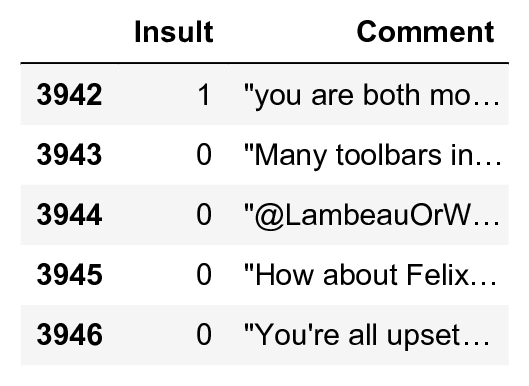

In [3]:
df[['Insult', 'Comment']].tail()

In [4]:
y = df['Insult']

In [5]:
tf = text.TfidfVectorizer()
X = tf.fit_transform(df['Comment'])
print(X.shape)

(3947, 16469)


In [6]:
p = 100 * X.nnz / float(X.shape[0] * X.shape[1])
print(f"Each sample has ~{p:.2f}% non-zero features.")

Each sample has ~0.15% non-zero features.


In [7]:
(X_train, X_test, y_train, y_test) = \
    ms.train_test_split(X, y, test_size=.2)

In [8]:
bnb = ms.GridSearchCV(
    nb.BernoulliNB(),
    param_grid={'alpha': np.logspace(-2., 2., 50)})
bnb.fit(X_train, y_train)

In [9]:
bnb.score(X_test, y_test)

0.761

In [10]:
# We first get the words corresponding to each feature
names = np.asarray(tf.get_feature_names())
# Next, we display the 50 words with the largest
# coefficients.
print(','.join(names[np.argsort(
    bnb.best_estimator_.coef_[0, :])[::-1][:50]]))

you,are,your,to,the,and,of,that,is,in,it,like,have,on,not,for,just,re,with,be,an,so,this,xa0,all,idiot,what,get,up,go,****,don,stupid,no,as,do,can,***,or,but,if,know,who,about,dumb,****,me,******,because,back


In [11]:
print(bnb.predict(tf.transform([
    "I totally agree with you.",
    "You are so stupid."
])))

[0 1]
